# Welcome to the Personal Project - EffiDirect: Boosting Direct Marketing Efficiency for Sustainable Investments


Hello! I'm Ayumu Justin Ueda, a Data Science student at UC Berkeley. You can find my profile on (https://www.linkedin.com/in/ayumu-ueda-ab1879224/).

In this project, I'm serving as a data scientist at an investment company, tasked with enhancing the effectiveness of our direct marketing for our new sustainable energy fund. Before joining the company, they attempted to promote a different type of fund to customers. I have been provided with data records detailing each customer's age, job, education, etc., along with whether they purchased those fund through our direct marketing efforts.

## Objective:

The primary objective is to enhance the KPI, specifically the purchasing rate of the sustainable energy fund.

-----
## Project Overview:
### 1. Identifying Customer Attributes Influencing Marketing Engagement (Regression Analysis):

**Skills Applied:**
- Data Analysis
- Logistic Regression Analysis
- Statistical Inference (Z-test)

**Conclusion for this section:**
- Individuals with higher levels of education show a stronger inclination towards investment banking and are more likely to purchase our fund.
- Jobless or retired individuals tend to consider investing for the future, making them a valuable target demographic.
- Singles display a higher interest in investing compared to divorced individuals.
- Participants from previous marketing efforts are likely to engage in future campaigns.
- It's advisable to limit the number of phone calls to 4 to 5 times, as beyond this point, the likelihood of making a purchase significantly decreases.

**Suggestions:**

Target individuals with higher education, retirees, and singles for phone calls. Prioritize those who engaged in previous marketing. Exercise caution, ensuring the number of contacts remains below 5, unless specific reasons dictate otherwise. This is crucial, as 95% of customer decided to purchase within 4 attempts.


### 2. Predicting the Likelihood of Marketing Engagement (Machine Learning Modeling):

**Skills Applied:**
- Data preprocessing
- Machine learning modeling for binary classification
- Hyperparameter tuning with Optuna
- Model interpretation

**Conclusion for this section:**

- In the test dataset, our initial approach involved making phone calls to 1569 people, resulting in 367 purchases. With the integration of this model for predictive analysis prior to calling, we only needed to reach out to 288 individuals, and 194 of them made a purchase. This led to a remarkable 80% reduction in our efforts.

- The LightGBM classifier, when applied to the test data, successfully pinpointed 53% of individuals who purchased. Following this identification, a 67% purchase rate was observed.

- Recognize the potential for a 47% loss in sales opportunities.


**Suggestions:**
- If minimizing the risk of losing potential customers is a top priority, reconsider using this model. However, if our marketing strategy involves multiple channels, and phone direct marketing is just one component, integrating this model can help trim down inefficiencies in phone calls. The resources saved can then be redirected to other channels, optimizing our overall marketing strategy.

----

### 0. Importing libraries

In [ ]:
!pip install ucimlrepo
!pip install optuna
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import  VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, accuracy_score
import optuna
from optuna.samplers import RandomSampler
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.5 MB/s eta 0:00:00


----

### **Dataset Information for Reference:**

| Column      | Type    | Description                                           |
|-------------|---------|-------------------------------------------------------|
| age         | Integer | Age                                                   |
| job         | Categorical | Occupation type of job                                |
| marital     | Categorical | Marital Status                                        |
| education   | Categorical | Education Level                                       |
| default     | Binary  | Has credit in default?                                |
| balance     | Integer | Average yearly balance (euros)                        |
| contact     | Categorical | Contact communication type                           |
| day_of_week | Date    | Last contact day of the week                          |
| month       | Date    | Last contact month of the year                        |
| campaign    | Integer | Number of contacts performed during this campaign for this client |
| pdays       | Integer | Number of days since the client was last contacted from a previous campaign (-1 means not contacted) |
| previous    | Integer | Number of contacts performed before this campaign for this client |
| poutcome    | Categorical | Outcome of Previous Campaign                          |
| y           | Binary  | whether they purchased our product through this campaign|


----

### 1. **Identifying Customer Attributes Influencing Marketing Engagement (Regression Analysis):**

In [ ]:
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)
# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets
X = X.dropna()
X = X.join(y)
X = X.reset_index(drop=True)
y = X[['y']]
X = X.drop('y', axis=1)
dump_list = ['housing', 'loan', 'duration']
X = X.drop(dump_list, axis=1)
y['conversion'] = y['y'].apply(lambda x:1 if x=='yes' else 0)
y = y.drop('y', axis=1)

In [ ]:
X.head()

,age,job,marital,education,default,balance,contact,day_of_week,month,campaign,pdays,previous,poutcome
0,33,admin.,married,tertiary,no,882,telephone,21,oct,1,151,3,failure
1,42,admin.,single,secondary,no,-247,telephone,21,oct,1,166,1,other
2,33,services,married,secondary,no,3444,telephone,21,oct,1,91,4,failure
3,36,management,married,tertiary,no,2415,telephone,22,oct,1,86,4,other
4,36,management,married,tertiary,no,0,telephone,23,oct,1,143,3,failure


In [ ]:
y.head()

,conversion
0,0
1,1
2,1
3,0
4,1


Text(0.5, 1.0, 'conversion number of this marketing')

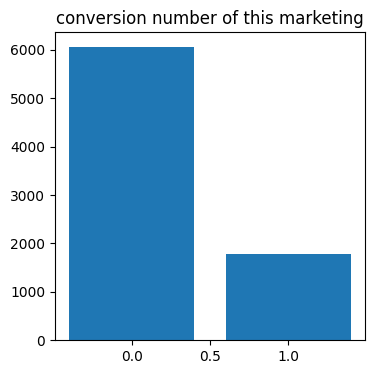

In [ ]:
plt.figure(figsize=(4,4))
plt.bar(y['conversion'].value_counts().index, y['conversion'].value_counts())
plt.title("conversion number of this marketing")

Text(0.5, 1.0, 'conversion rate of this marketing')

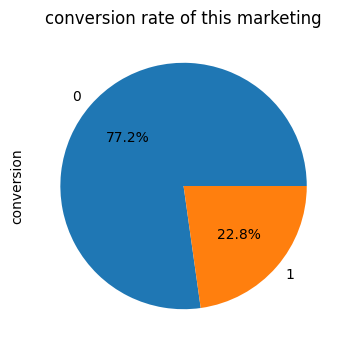

In [ ]:
plt.figure(figsize=(4,4))
y['conversion'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("conversion rate of this marketing")

conversion rate for previous marketing was around 22.8%

#### **Categorical data encoding**

converting categorical data to numerical. I'm using label encoding for ordinal and binary data, and one-hot encoding for nominal data.




In [ ]:
#ordinal
educations = {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 4}
months = {'oct':10, 'may':5, 'apr':4, 'jun':6, 'feb':2, 'aug':8, 'jan':1, 'jul':7, 'nov':11,
       'sep':9, 'mar':3, 'dec':12}
#binary
defaults = {'yes':1, 'no':0}

#label encoding
X['education'] = X['education'].map(educations)
X['month'] = X['month'].map(months)
X['default'] = X['default'].map(defaults)

#nominal
nominal_columns = ['job', 'marital', 'contact', 'poutcome']

#one hot encoding
one_hot_encoded_data = pd.get_dummies(X, columns = nominal_columns)
one_hot_encoded_data.head()

,age,education,default,balance,day_of_week,month,campaign,pdays,previous,job_admin.,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,33,3,0,882,21,10,1,151,3,1,...,0,0,0,1,0,0,1,1,0,0
1,42,2,0,-247,21,10,1,166,1,1,...,0,0,0,0,1,0,1,0,1,0
2,33,2,0,3444,21,10,1,91,4,0,...,0,0,0,1,0,0,1,1,0,0
3,36,3,0,2415,22,10,1,86,4,0,...,0,0,0,1,0,0,1,0,1,0
4,36,3,0,0,23,10,1,143,3,0,...,0,0,0,1,0,0,1,1,0,0


Now it seems that all columns are numerical data.

#### **alleviate multicollinearity**

make sure that each columns should not be correlated

<Axes: >

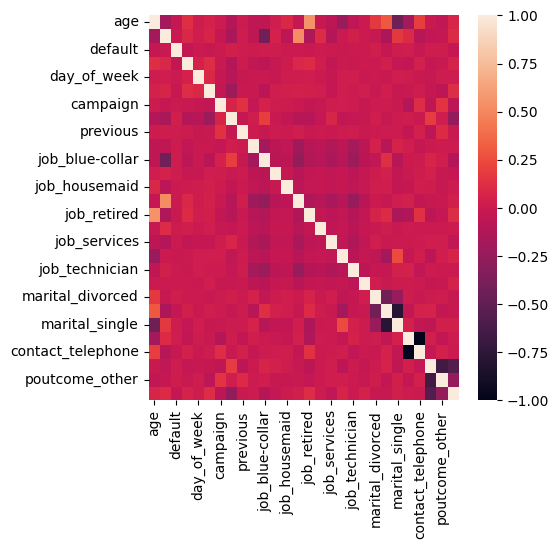

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(one_hot_encoded_data.corr())

In [ ]:
absolute_corr = one_hot_encoded_data.corr().abs()
absolute_corr_tbl = absolute_corr.unstack()
absolute_corr_tbl_rank = absolute_corr_tbl.sort_values(kind="quicksort", ascending=False)
absolute_corr_tbl_rank[30:50]

marital_married   marital_single      0.783321
marital_single    marital_married     0.783321
poutcome_other    poutcome_failure    0.651878
poutcome_failure  poutcome_other      0.651878
poutcome_success  poutcome_failure    0.570199
poutcome_failure  poutcome_success    0.570199
job_retired       age                 0.551188
age               job_retired         0.551188
job_management    education           0.529381
education         job_management      0.529381
age               marital_single      0.439504
marital_single    age                 0.439504
education         job_blue-collar     0.418163
job_blue-collar   education           0.418163
marital_married   marital_divorced    0.414505
marital_divorced  marital_married     0.414505
marital_married   age                 0.303761
age               marital_married     0.303761
job_blue-collar   job_management      0.264919
job_management    job_blue-collar     0.264919
dtype: float64

columns "marital_married" and "marital_single", "poutcome_other" and "poutcome_failure" are highly correlated. thus, I remove "marital_married" and "poutcome_failure" to reduce the effect of multicollinearity for regression analysis

In [ ]:
one_hot_encoded_data = one_hot_encoded_data.drop(["marital_married", "poutcome_failure"], axis=1)

Finally, I have completed preprocessing the data and am now ready to begin regression analysis

#### **Logistic regression analysis with only continuous data**

First off, let's focus on continuous data for simplicity

In [ ]:
X.head()

,age,job,marital,education,default,balance,contact,day_of_week,month,campaign,pdays,previous,poutcome
0,33,admin.,married,3,0,882,telephone,21,10,1,151,3,failure
1,42,admin.,single,2,0,-247,telephone,21,10,1,166,1,other
2,33,services,married,2,0,3444,telephone,21,10,1,91,4,failure
3,36,management,married,3,0,2415,telephone,22,10,1,86,4,other
4,36,management,married,3,0,0,telephone,23,10,1,143,3,failure


In [ ]:
continuous_table = X.drop(['job', 'marital', 'contact', 'poutcome'], axis=1)

In [ ]:
sm.Logit(y['conversion'], continuous_table).fit().summary()

Optimization terminated successfully.
         Current function value: 0.517879
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                 7842
Model:                          Logit   Df Residuals:                     7833
Method:                           MLE   Df Model:                            8
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                 0.03478
Time:                        23:57:42   Log-Likelihood:                -4061.2
converged:                       True   LL-Null:                       -4207.6
Covariance Type:            nonrobust   LLR p-value:                 1.481e-58
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -0.0040      0.002     -2.126      0.034      -0.008      -0.000
education       0.0334      0.033      1.005      0.315      -0.032       0.098
default        -1.1737      0.524     -2.239      0.025      -2.201      -0.146
balance      3.402e-05   8.44e-06      4.033      0.000    1.75e-05    5.06e-05
day_of_week    -0.0078      0.003     -2.362      0.018      -0.014      -0.001
month           0.0280      0.008      3.336      0.001       0.012       0.044
campaign       -0.2127      0.022     -9.596      0.000      -0.256      -0.169
pdays          -0.0038      0.000    -15.881      0.000      -0.004      -0.003
previous        0.0054      0.006      0.972      0.331      -0.005       0.016
===============================================================================
"""

R-square is 0.03478. The p-value (P>|z|) is used to test the null hypothesis that the corresponding coefficient is equal to zero. Thus, the above summary describes that with 5% significance, 'age', 'default', 'balance', 'day_of_week', 'month', 'campaign', "pdays" coefficiens are not equal to 0 and these customer information might influence the customer's decision for marketing engagement.


| Column       | Type    | Description                                           |
|--------------|---------|-------------------------------------------------------|
| age          | Integer | Customer's age                                        |
| default      | Binary  | Has credit in default?                                |
| balance      | Integer | Average yearly balance (euros)                        |
| day_of_week  | Date    | Last contact day of the week                          |
| month        | Date    | Last contact month of the year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |
| campaign     | Integer | Number of contacts performed during this campaign for this client |
| pdays        | Integer | Number of days since the client was last contacted from a previous campaign (-1 means not contacted) |


#### **Logistic regression analysis with all type of data**

Second of all, let's consider both categorical and continuous features to conduct the regression analysis

In [ ]:
logit = sm.Logit(y['conversion'], one_hot_encoded_data[[i for i in one_hot_encoded_data.columns if i != 'conversion']])
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.422498
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                 7842
Model:                          Logit   Df Residuals:                     7817
Method:                           MLE   Df Model:                           24
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                  0.2126
Time:                        23:57:42   Log-Likelihood:                -3313.2
converged:                       True   LL-Null:                       -4207.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0116      0.004      3.017      0.003       0.004       0.019
education             0.1889      0.065      2.924      0.003       0.062       0.315
default              -0.7236      0.535     -1.352      0.176      -1.773       0.325
balance            2.698e-05   9.68e-06      2.788      0.005    8.01e-06     4.6e-05
day_of_week           0.0057      0.004      1.450      0.147      -0.002       0.013
month                 0.0556      0.010      5.485      0.000       0.036       0.076
campaign             -0.1500      0.024     -6.223      0.000      -0.197      -0.103
pdays                 0.0003      0.000      0.891      0.373      -0.000       0.001
previous              0.0118      0.007      1.744      0.081      -0.001       0.025
job_admin.           -0.5255   2.48e+06  -2.12e-07      1.000   -4.85e+06    4.85e+06
job_blue-collar      -1.0321   2.48e+06  -4.17e-07      1.000   -4.85e+06    4.85e+06
job_entrepreneur     -1.1717   2.48e+06  -4.73e-07      1.000   -4.85e+06    4.85e+06
job_housemaid        -0.6009   2.48e+06  -2.43e-07      1.000   -4.85e+06    4.85e+06
job_management       -0.4032   2.48e+06  -1.63e-07      1.000   -4.85e+06    4.85e+06
job_retired          -0.0892   2.48e+06   -3.6e-08      1.000   -4.85e+06    4.85e+06
job_self-employed    -0.5717   2.48e+06  -2.31e-07      1.000   -4.85e+06    4.85e+06
job_services         -0.6984   2.48e+06  -2.82e-07      1.000   -4.85e+06    4.85e+06
job_student           0.3144   2.48e+06   1.27e-07      1.000   -4.85e+06    4.85e+06
job_technician       -0.6617   2.48e+06  -2.67e-07      1.000   -4.85e+06    4.85e+06
job_unemployed        0.0872   2.48e+06   3.52e-08      1.000   -4.85e+06    4.85e+06
marital_divorced     -0.2318      0.107     -2.170      0.030      -0.441      -0.022
marital_single        0.1792      0.079      2.268      0.023       0.024       0.334
contact_cellular     -2.5580   2.48e+06  -1.03e-06      1.000   -4.85e+06    4.85e+06
contact_telephone    -2.7947   2.48e+06  -1.13e-06      1.000   -4.85e+06    4.85e+06
poutcome_other        0.3877      0.081      4.776      0.000       0.229       0.547
poutcome_success      2.4007      0.076     31.768      0.000       2.253       2.549
=====================================================================================
"""

R-square is increased to 0.2126, but this model seems to be encountering numerical issues that the column start with "job" are not contributing to inference because of sparseness of the data. howerver, this data is not ordinal, so I would not use label encoding. Therefore, I try to convert these columns into two columns employment_status and retirement_status and compress the information.

In [ ]:
one_hot_encoded_data = one_hot_encoded_data.rename(columns={'job_retired':'retirement_status'})
sum_columns = ['job_admin.', 'job_blue-collar','job_entrepreneur', 'job_housemaid', 'job_management', 'retirement_status', 'job_self-employed', 'job_services', 'job_student',
'job_technician']
one_hot_encoded_data['employment-status'] = one_hot_encoded_data[sum_columns].sum(axis=1)
one_hot_encoded_data = one_hot_encoded_data.loc[:, ~one_hot_encoded_data.columns.str.startswith('job')]

In [ ]:
one_hot_encoded_data.columns

Index(['age', 'education', 'default', 'balance', 'day_of_week', 'month',
       'campaign', 'pdays', 'previous', 'retirement_status',
       'marital_divorced', 'marital_single', 'contact_cellular',
       'contact_telephone', 'poutcome_other', 'poutcome_success',
       'employment-status'],
      dtype='object')

#### **Logistic regression analysis after feature engineering**

Standardizing the variables helps make the coefficients comparable and interpretable in terms of effect size, so I use StandardScaler and standarize the each column

In [ ]:
scaler = MinMaxScaler()
one_hot_encoded_data[one_hot_encoded_data.columns] = scaler.fit_transform(one_hot_encoded_data)
one_hot_encoded_data.head()

,age,education,default,balance,day_of_week,month,campaign,pdays,previous,retirement_status,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_other,poutcome_success,employment-status
0,0.211268,1.0,0.0,0.033290,0.666667,0.818182,0.0,0.172414,0.007299,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.338028,0.5,0.0,0.019702,0.666667,0.818182,0.0,0.189655,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2,0.211268,0.5,0.0,0.064125,0.666667,0.818182,0.0,0.103448,0.010949,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.253521,1.0,0.0,0.051740,0.700000,0.818182,0.0,0.097701,0.010949,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.253521,1.0,0.0,0.022675,0.733333,0.818182,0.0,0.163218,0.007299,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Now, I have the data format that I expected. Let's give it try again

In [ ]:
logit = sm.Logit(y['conversion'], one_hot_encoded_data[[i for i in one_hot_encoded_data.columns if i != 'conversion']])
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.426802
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                 7842
Model:                          Logit   Df Residuals:                     7825
Method:                           MLE   Df Model:                           16
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                  0.2045
Time:                        23:57:43   Log-Likelihood:                -3347.0
converged:                       True   LL-Null:                       -4207.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.6305      0.264      2.392      0.017       0.114       1.147
education             0.6418      0.102      6.304      0.000       0.442       0.841
default              -0.8395      0.548     -1.531      0.126      -1.914       0.235
balance               2.4378      0.805      3.027      0.002       0.859       4.016
day_of_week           0.1865      0.118      1.586      0.113      -0.044       0.417
month                 0.6338      0.111      5.712      0.000       0.416       0.851
campaign             -2.2176      0.357     -6.206      0.000      -2.918      -1.517
pdays                 0.0728      0.258      0.282      0.778      -0.433       0.578
previous              3.4693      1.868      1.857      0.063      -0.192       7.130
retirement_status     0.6481      0.148      4.383      0.000       0.358       0.938
marital_divorced     -0.1909      0.106     -1.796      0.072      -0.399       0.017
marital_single        0.2702      0.077      3.513      0.000       0.119       0.421
contact_cellular     -2.3405      0.237     -9.867      0.000      -2.805      -1.876
contact_telephone    -2.5333      0.271     -9.354      0.000      -3.064      -2.002
poutcome_other        0.4049      0.081      5.019      0.000       0.247       0.563
poutcome_success      2.4245      0.075     32.282      0.000       2.277       2.572
employment-status    -0.7008      0.170     -4.117      0.000      -1.034      -0.367
=====================================================================================
"""

The R-squared value has decreased to 0.2045, but based on the summary of the logistic regression, each row contains valid values.

The columns contributing to the inference are the ones below.

| Column      | Type    | Description                                           |
|-------------|---------|-------------------------------------------------------|
| age         | Integer | Age                                                   |
| marital     | Categorical | Marital Status                                        |
| education   | Categorical | Education Level                                       |
| balance     | Integer | Average yearly balance (euros)                        |
| contact     | Categorical | Contact communication type                           |
| month       | Date    | Last contact month of the year                        |
| campaign    | Integer | Number of contacts performed during this campaign for this client |
| poutcome    | Categorical | Outcome of Previous Campaign                          |
| employment-status    | Integer | if they are employed 1, if not 0                           |
| retirement_status    | Integer | if they are retired 1, if not 0                          |



#### **Results from the above analysis**

- Individuals with higher levels of education show a stronger inclination towards investment banking and are more likely to purchase our product.
- Jobless or retired individuals tend to consider investing for the future, making them a valuable target demographic.
- Singles display a higher interest in investing compared to divorced individuals.
- Respondents from previous marketing efforts are likely to engage in future campaigns.


When we call people more often ("campaign"), the chance of them saying yes goes down. This could be because constant calling might annoy them.
We want to find the sweet spot where we call just enough times. If we call too little, we might miss a potential deal, but if we call too much, we risk annoying them. We need to figure out the right number.

Text(0, 0.5, 'ratio of customers per bin')

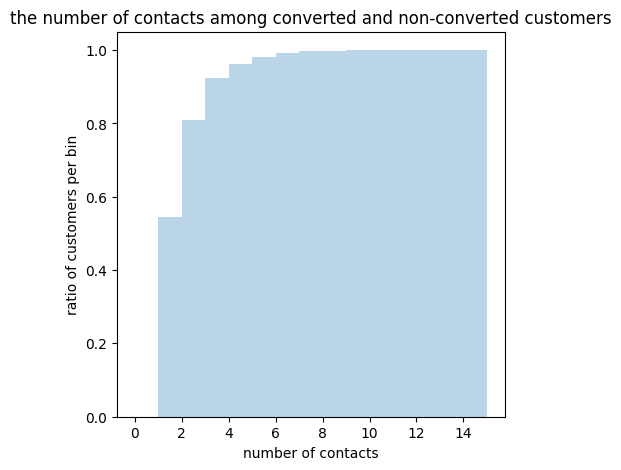

In [ ]:
combined_data = pd.concat([y, X], axis=1)
converted_data = combined_data.loc[combined_data['conversion'] == 1]
plt.figure(figsize=(5,5))
plt.hist(converted_data['campaign'], bins=30, alpha=0.3, range=(0,15), density=True, cumulative=True)
plt.title('the number of contacts among converted and non-converted customers')
plt.xlabel('number of contacts')
plt.ylabel('ratio of customers per bin')

Looking at the graph, it seems that the maximum number of phone calls should be around 4 times. This is the point where we need to stop calling.



---



### **2. Predicting the Likelihood of Marketing Engagement (Machine Learning Modeling):**

In Section 1, we identified the types of individuals we should target for direct marketing. However, we still lack specific details on whom to approach and the likelihood of them answering our phone calls. In Section 2, I employ machine learning models to predict the probability of a positive response based on their characteristics.

Firstly, I create new features and apply five different models to observe the results.

In [ ]:
one_hot_encoded_data_dummy = one_hot_encoded_data.copy()
X_train, X_test, y_train, y_test = train_test_split(
  one_hot_encoded_data,y , random_state=104,test_size=0.25, shuffle=True)

In [ ]:
X_train.head()

,age,education,default,balance,day_of_week,month,campaign,pdays,previous,retirement_status,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_other,poutcome_success,employment-status
1110,0.183099,0.5,0.0,0.026334,0.933333,0.000000,0.066667,0.182759,0.003650,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
5393,0.126761,1.0,0.0,0.104407,0.133333,0.636364,0.066667,0.078161,0.091241,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3476,0.183099,0.5,0.0,0.022771,0.233333,0.363636,0.066667,0.194253,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6870,0.591549,0.0,0.0,0.024865,0.833333,0.272727,0.266667,0.206897,0.014599,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5918,0.309859,0.5,0.0,0.049947,0.500000,0.818182,0.000000,0.167816,0.014599,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### **Random Forest Model**

Text(0.5, 0, 'Relative Importance')

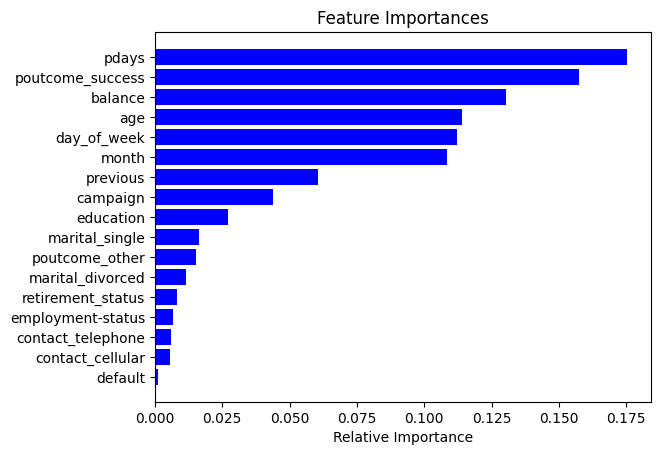

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1493
           1       0.68      0.48      0.56       468

    accuracy                           0.82      1961
   macro avg       0.76      0.71      0.73      1961
weighted avg       0.81      0.82      0.81      1961



From the feature importances derived from the random forest model, it seems that pdays, poutcome, balance, age, day_of_week, month, previous, campaign, and education play crucial roles in determining the engagement rate. This slightly deviates from my earlier regression analysis results.

#### **Support Vector Model**

In [ ]:
svc = SVC(random_state=42)
model2 = svc.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1493
           1       0.65      0.53      0.58       468

    accuracy                           0.82      1961
   macro avg       0.75      0.72      0.73      1961
weighted avg       0.81      0.82      0.81      1961



#### **Logistic Regression model**

In [ ]:
model3 = LogisticRegression(random_state=0, solver='newton-cholesky').fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1493
           1       0.66      0.51      0.57       468

    accuracy                           0.82      1961
   macro avg       0.76      0.71      0.73      1961
weighted avg       0.81      0.82      0.81      1961



#### **KNeighbors model**

In [ ]:
model4 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1493
           1       0.62      0.43      0.51       468

    accuracy                           0.80      1961
   macro avg       0.73      0.68      0.69      1961
weighted avg       0.79      0.80      0.79      1961



#### **LightGBM Classifier**

In [ ]:
model5 = lgb.LGBMClassifier(random_state=42)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

[LightGBM] [Info] Number of positive: 1318, number of negative: 4563
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 5881, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224112 -> initscore=-1.241865
[LightGBM] [Info] Start training from score -1.241865
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1493
           1       0.66      0.51      0.58       468

    accuracy                           0.82      1961
   macro avg       0.76      0.72      0.73      1961
weighted avg       0.81      0.82      0.81      1961



#### **Compare these five models**

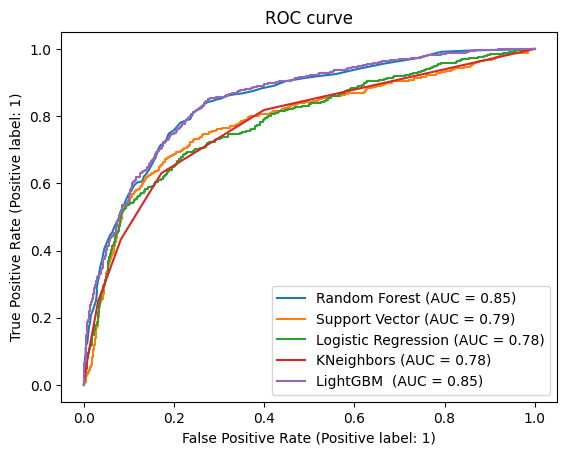

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("Random Forest", model),
    ("Support Vector", model2),
    ("Logistic Regression", model3),
    ("KNeighbors", model4),
    ("LightGBM ", model5)
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, X_test, y_test, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")

Using the Random Forest model, visualize confusion matrix.

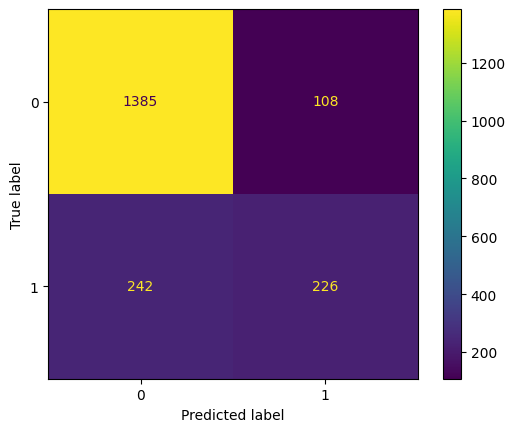

In [ ]:
cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

#### **Metrics**

The Support Vector Machine model's F1-score matches the top-performing Random Forest and LightGBM models, but its AUC trails behind. This indicates that AUC may not be the best metric due to imbalanced data. Therefore, I've opted for F1-score in this section as it considers both precision and recall. We aim to minimize phone calls (measured by precision) and avoid missing potential customers (addressed by recall), making F1-score the suitable metric for our goals.

#### **Five fold cross validation with f1 score**

In [ ]:
def five_fold_cross_validation(clf, X, y, k=5):
  skf = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)
  scores = []

  for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train = X.loc[train_index, :]
    y_train = y.loc[train_index, :]
    X_test = X.loc[test_index, :]
    y_test = y.loc[test_index, :]
    model = clf.fit(X_train, y_train)
    scores.append(f1_score(y_test, model.predict(X_test)))

  mean_score = np.mean(scores)
  mean_score = mean_score.item()
  print(f"f1 score : {mean_score}")
  return mean_score

#### **Combine predictors using stacking**

Let's combine the three best models together and see if the model's f1 score improves.

In [ ]:
ensembled_clf = VotingClassifier(estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=0)),
    ('lgb', lgb.LGBMClassifier(random_state=42, verbosity = -1)),
    ('svc', make_pipeline(StandardScaler(), SVC(random_state=42))),
], voting='hard')

In [ ]:
ensembled_clf

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=0)),
                             ('lgb',
                              LGBMClassifier(random_state=42, verbosity=-1)),
                             ('svc',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc', SVC(random_state=42))]))])

In [ ]:
voting_stacked_result = five_fold_cross_validation(ensembled_clf, one_hot_encoded_data, y, 3)

f1 score : 0.5726133711591653


0.5726133711591653

#### **Compare stacked model with other models under the same condition**

In [ ]:
clf = LogisticRegression(random_state=0, solver='newton-cholesky')
five_fold_cross_validation(clf, one_hot_encoded_data, y)

clf = RandomForestClassifier(n_estimators=100, random_state=0)
five_fold_cross_validation(clf, one_hot_encoded_data, y)

clf = SVC(random_state=42)
five_fold_cross_validation(clf, one_hot_encoded_data, y)

clf = KNeighborsClassifier(n_neighbors=5)
five_fold_cross_validation(clf, one_hot_encoded_data, y)

params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state" : 42}

clf = lgb.LGBMClassifier(**params)
five_fold_cross_validation(clf, one_hot_encoded_data, y)

f1 score : 0.5570256000085088
f1 score : 0.5617309903603421
f1 score : 0.5709267942047336
f1 score : 0.5146074683056893
f1 score : 0.5803191932118228


0.5803191932118228

According to this result, it seems that the performance of the standalone models are higher than that of the stacked model.

#### **Hyperparameter Tuning of lightGBM Classifier**
**Objective:** Improve the performance of the lightGBM Classifier through hyperparameter tuning.

**Algorithm:** Bayesian optimization(Optuna)

In [ ]:
def gbm_objective(trial):

    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "random_state" : 42
    }

    model = lgb.LGBMClassifier(
        **params
    )

    result = five_fold_cross_validation(model, X_train, y_train, 3)

    return result

# Assuming you have a function five_fold_cross_validation defined

X_train, X_eval, y_train, y_eval = train_test_split(
    one_hot_encoded_data, y, random_state=104, test_size=0.20, shuffle=True
)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

gbm_study = optuna.create_study(direction='maximize', sampler=RandomSampler(42))
gbm_study.optimize(gbm_objective, n_trials=30)

optuna.visualization.plot_optimization_history(gbm_study).show()

best_gbm_params = gbm_study.best_params

best_param_gbm = lgb.LGBMClassifier(
    **best_gbm_params
)

best_param_gbm = best_param_gbm.fit(X_train, y_train)
y_pred = best_param_gbm.predict(X_eval)
gbm_f1 = f1_score(y_eval, y_pred)

print("LightGBM Model F1 Score:", gbm_f1)


[I 2024-01-05 23:58:34,498] A new study created in memory with name: no-name-f95f206c-abcf-41da-8c54-a4b44a678356
[I 2024-01-05 23:58:35,309] Trial 0 finished with value: 0.5575863103276627 and parameters: {'lambda_l1': 2.348881295853308e-05, 'lambda_l2': 3.6010467344475403, 'num_leaves': 188, 'feature_fraction': 0.759195090518222, 'bagging_fraction': 0.4936111842654619, 'bagging_freq': 2, 'min_child_samples': 10}. Best is trial 0 with value: 0.5575863103276627.


f1 score : 0.5575863103276627


[I 2024-01-05 23:58:36,092] Trial 1 finished with value: 0.5466843299427366 and parameters: {'lambda_l1': 0.6245760287469893, 'lambda_l2': 0.002570603566117598, 'num_leaves': 182, 'feature_fraction': 0.41235069657748147, 'bagging_fraction': 0.9819459112971965, 'bagging_freq': 6, 'min_child_samples': 25}. Best is trial 0 with value: 0.5575863103276627.


f1 score : 0.5466843299427366


[I 2024-01-05 23:58:36,672] Trial 2 finished with value: 0.5675158892900571 and parameters: {'lambda_l1': 4.329370014459266e-07, 'lambda_l2': 4.4734294104626844e-07, 'num_leaves': 79, 'feature_fraction': 0.7148538589793427, 'bagging_fraction': 0.6591670111852694, 'bagging_freq': 3, 'min_child_samples': 63}. Best is trial 2 with value: 0.5675158892900571.


f1 score : 0.5675158892900571


[I 2024-01-05 23:58:37,400] Trial 3 finished with value: 0.5599211189419738 and parameters: {'lambda_l1': 1.8007140198129195e-07, 'lambda_l2': 4.258943089524393e-06, 'num_leaves': 95, 'feature_fraction': 0.6736419905302216, 'bagging_fraction': 0.8711055768358081, 'bagging_freq': 2, 'min_child_samples': 54}. Best is trial 2 with value: 0.5675158892900571.


f1 score : 0.5599211189419738


[I 2024-01-05 23:58:37,767] Trial 4 finished with value: 0.5694664330860585 and parameters: {'lambda_l1': 0.0021465011216654484, 'lambda_l2': 2.6185068507773707e-08, 'num_leaves': 156, 'feature_fraction': 0.502314474212375, 'bagging_fraction': 0.43903095579116774, 'bagging_freq': 7, 'min_child_samples': 97}. Best is trial 4 with value: 0.5694664330860585.


f1 score : 0.5694664330860585


[I 2024-01-05 23:58:38,259] Trial 5 finished with value: 0.567446134945167 and parameters: {'lambda_l1': 0.18861495878553936, 'lambda_l2': 5.514725787121931e-06, 'num_leaves': 26, 'feature_fraction': 0.8105398159072941, 'bagging_fraction': 0.6640914962437607, 'bagging_freq': 1, 'min_child_samples': 52}. Best is trial 4 with value: 0.5694664330860585.


f1 score : 0.567446134945167


[I 2024-01-05 23:58:38,815] Trial 6 finished with value: 0.5673572991871625 and parameters: {'lambda_l1': 2.039373116525212e-08, 'lambda_l2': 1.527156759251193, 'num_leaves': 67, 'feature_fraction': 0.7975133706123891, 'bagging_fraction': 0.5870266456536466, 'bagging_freq': 4, 'min_child_samples': 57}. Best is trial 4 with value: 0.5694664330860585.


f1 score : 0.5673572991871625


[I 2024-01-05 23:58:39,428] Trial 7 finished with value: 0.5651952541128314 and parameters: {'lambda_l1': 4.609885087947832e-07, 'lambda_l2': 5.324289357128436, 'num_leaves': 199, 'feature_fraction': 0.9636993649385135, 'bagging_fraction': 0.9368964102565893, 'bagging_freq': 5, 'min_child_samples': 93}. Best is trial 4 with value: 0.5694664330860585.


f1 score : 0.5651952541128314


[I 2024-01-05 23:58:39,833] Trial 8 finished with value: 0.5654962890909118 and parameters: {'lambda_l1': 6.257956190096665e-08, 'lambda_l2': 5.805581976088804e-07, 'num_leaves': 13, 'feature_fraction': 0.5951981984579586, 'bagging_fraction': 0.6332063738136893, 'bagging_freq': 2, 'min_child_samples': 84}. Best is trial 4 with value: 0.5694664330860585.


f1 score : 0.5654962890909118


[I 2024-01-05 23:58:40,297] Trial 9 finished with value: 0.5759511909061424 and parameters: {'lambda_l1': 1.6247252885719427e-05, 'lambda_l2': 3.376063348877853e-06, 'num_leaves': 140, 'feature_fraction': 0.4845545349848576, 'bagging_fraction': 0.8813181884524238, 'bagging_freq': 1, 'min_child_samples': 99}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5759511909061424


[I 2024-01-05 23:58:40,548] Trial 10 finished with value: 0.5700992949779121 and parameters: {'lambda_l1': 0.08916674715636537, 'lambda_l2': 6.143857495033091e-07, 'num_leaves': 3, 'feature_fraction': 0.8892768570729005, 'bagging_fraction': 0.8241144063085704, 'bagging_freq': 6, 'min_child_samples': 79}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5700992949779121


[I 2024-01-05 23:58:41,124] Trial 11 finished with value: 0.5573826922233003 and parameters: {'lambda_l1': 4.638759594322625e-08, 'lambda_l2': 1.683416412018213e-05, 'num_leaves': 31, 'feature_fraction': 0.9178620555253562, 'bagging_fraction': 0.7739788760965347, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5573826922233003


[I 2024-01-05 23:58:43,453] Trial 12 finished with value: 0.5365748076936846 and parameters: {'lambda_l1': 6.292756043818863e-06, 'lambda_l2': 8.445977074223802e-06, 'num_leaves': 188, 'feature_fraction': 0.7825344828131279, 'bagging_fraction': 0.932327645545796, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5365748076936846


[I 2024-01-05 23:58:44,431] Trial 13 finished with value: 0.5604460782840794 and parameters: {'lambda_l1': 0.02625445968759339, 'lambda_l2': 0.0703178263660987, 'num_leaves': 145, 'feature_fraction': 0.8625803079727365, 'bagging_fraction': 0.6962773578186345, 'bagging_freq': 4, 'min_child_samples': 46}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5604460782840794


[I 2024-01-05 23:58:44,904] Trial 14 finished with value: 0.5753120153907529 and parameters: {'lambda_l1': 1.6934490731313353e-08, 'lambda_l2': 9.354548757337708e-08, 'num_leaves': 10, 'feature_fraction': 0.7818462467582683, 'bagging_fraction': 0.588613588645796, 'bagging_freq': 4, 'min_child_samples': 92}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5753120153907529


[I 2024-01-05 23:58:45,910] Trial 15 finished with value: 0.5590941836468347 and parameters: {'lambda_l1': 1.7523871598466864e-06, 'lambda_l2': 4.9368087974032924e-05, 'num_leaves': 194, 'feature_fraction': 0.5372788992949735, 'bagging_fraction': 0.44618794589727584, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5590941836468347


[I 2024-01-05 23:58:46,716] Trial 16 finished with value: 0.5758077404262733 and parameters: {'lambda_l1': 2.3295866619309256, 'lambda_l2': 0.18753546777666233, 'num_leaves': 163, 'feature_fraction': 0.9228763541126306, 'bagging_fraction': 0.8822032461394687, 'bagging_freq': 2, 'min_child_samples': 90}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5758077404262733


[I 2024-01-05 23:58:47,301] Trial 17 finished with value: 0.5699040344794378 and parameters: {'lambda_l1': 0.000714628244934021, 'lambda_l2': 0.18491042486838075, 'num_leaves': 230, 'feature_fraction': 0.5908020849831184, 'bagging_fraction': 0.46603115471660606, 'bagging_freq': 2, 'min_child_samples': 46}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5699040344794378


[I 2024-01-05 23:58:47,560] Trial 18 finished with value: 0.572626993645951 and parameters: {'lambda_l1': 0.23021461620759875, 'lambda_l2': 0.557924264150636, 'num_leaves': 3, 'feature_fraction': 0.7064483815465394, 'bagging_fraction': 0.6504466018892674, 'bagging_freq': 2, 'min_child_samples': 16}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.572626993645951


[I 2024-01-05 23:58:48,092] Trial 19 finished with value: 0.5734404454300311 and parameters: {'lambda_l1': 1.0927895733904103e-05, 'lambda_l2': 3.0632845126552133, 'num_leaves': 84, 'feature_fraction': 0.7112743730460196, 'bagging_fraction': 0.8218113753371068, 'bagging_freq': 3, 'min_child_samples': 98}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5734404454300311


[I 2024-01-05 23:58:48,465] Trial 20 finished with value: 0.5705537274072539 and parameters: {'lambda_l1': 4.592251392089998, 'lambda_l2': 1.845188173664121e-06, 'num_leaves': 128, 'feature_fraction': 0.5805269858900618, 'bagging_fraction': 0.5709042966264806, 'bagging_freq': 1, 'min_child_samples': 63}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5705537274072539


[I 2024-01-05 23:58:49,071] Trial 21 finished with value: 0.5619188662286176 and parameters: {'lambda_l1': 0.0003342806277473177, 'lambda_l2': 2.906088000706637e-08, 'num_leaves': 73, 'feature_fraction': 0.9449595315799922, 'bagging_fraction': 0.5437371344001835, 'bagging_freq': 2, 'min_child_samples': 51}. Best is trial 9 with value: 0.5759511909061424.


f1 score : 0.5619188662286176


[I 2024-01-05 23:58:49,468] Trial 22 finished with value: 0.5850887613047776 and parameters: {'lambda_l1': 7.427695424061678, 'lambda_l2': 1.5083337319786327e-06, 'num_leaves': 173, 'feature_fraction': 0.8569717691972305, 'bagging_fraction': 0.5425825263954398, 'bagging_freq': 6, 'min_child_samples': 40}. Best is trial 22 with value: 0.5850887613047776.


f1 score : 0.5850887613047776


[I 2024-01-05 23:58:50,503] Trial 23 finished with value: 0.5484208030639582 and parameters: {'lambda_l1': 0.00490628164601872, 'lambda_l2': 0.005032310118297565, 'num_leaves': 138, 'feature_fraction': 0.454173862032645, 'bagging_fraction': 0.9011814973535428, 'bagging_freq': 3, 'min_child_samples': 22}. Best is trial 22 with value: 0.5850887613047776.


f1 score : 0.5484208030639582


[I 2024-01-05 23:58:51,057] Trial 24 finished with value: 0.5669527641336791 and parameters: {'lambda_l1': 2.3279640748356466e-08, 'lambda_l2': 0.0020798714270728416, 'num_leaves': 174, 'feature_fraction': 0.4099526973567137, 'bagging_fraction': 0.7072558349795686, 'bagging_freq': 2, 'min_child_samples': 66}. Best is trial 22 with value: 0.5850887613047776.


f1 score : 0.5669527641336791


[I 2024-01-05 23:58:52,015] Trial 25 finished with value: 0.5336814514823527 and parameters: {'lambda_l1': 3.709350405068891e-07, 'lambda_l2': 0.016536349510675875, 'num_leaves': 100, 'feature_fraction': 0.9620379932420408, 'bagging_fraction': 0.482512566487596, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 22 with value: 0.5850887613047776.


f1 score : 0.5336814514823527


[I 2024-01-05 23:58:52,627] Trial 26 finished with value: 0.5655971571865904 and parameters: {'lambda_l1': 2.100112522343288, 'lambda_l2': 0.7871439837551527, 'num_leaves': 67, 'feature_fraction': 0.7959904276205074, 'bagging_fraction': 0.8903333201207295, 'bagging_freq': 4, 'min_child_samples': 55}. Best is trial 22 with value: 0.5850887613047776.


f1 score : 0.5655971571865904


[I 2024-01-05 23:58:53,502] Trial 27 finished with value: 0.5521447125000168 and parameters: {'lambda_l1': 1.5020023705702004e-06, 'lambda_l2': 6.885332382888648e-08, 'num_leaves': 230, 'feature_fraction': 0.9402508342979983, 'bagging_fraction': 0.7798608743639608, 'bagging_freq': 3, 'min_child_samples': 38}. Best is trial 22 with value: 0.5850887613047776.


f1 score : 0.5521447125000168


[I 2024-01-05 23:58:54,402] Trial 28 finished with value: 0.5436905761570744 and parameters: {'lambda_l1': 0.03416654859330391, 'lambda_l2': 1.1857478328321251, 'num_leaves': 228, 'feature_fraction': 0.8679253275145743, 'bagging_fraction': 0.7852189876925726, 'bagging_freq': 1, 'min_child_samples': 20}. Best is trial 22 with value: 0.5850887613047776.


f1 score : 0.5436905761570744


[I 2024-01-05 23:58:54,658] Trial 29 finished with value: 0.5676387713393717 and parameters: {'lambda_l1': 1.2217650479327244, 'lambda_l2': 0.0028698654570754596, 'num_leaves': 4, 'feature_fraction': 0.4608829257196193, 'bagging_fraction': 0.7981010614648335, 'bagging_freq': 1, 'min_child_samples': 20}. Best is trial 22 with value: 0.5850887613047776.


f1 score : 0.5676387713393717


[LightGBM] [Warning] feature_fraction is set=0.8569717691972305, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8569717691972305
[LightGBM] [Warning] lambda_l2 is set=1.5083337319786327e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5083337319786327e-06
[LightGBM] [Warning] lambda_l1 is set=7.427695424061678, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.427695424061678
[LightGBM] [Warning] bagging_fraction is set=0.5425825263954398, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5425825263954398
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8569717691972305, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8569717691972305
[LightGBM] [Warning] lambda_l2 is set=1.5083337319786327e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5083337319786327e-06
[LightGBM] [Warning] l

[LightGBM] [Warning] feature_fraction is set=0.8569717691972305, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8569717691972305
[LightGBM] [Warning] lambda_l2 is set=1.5083337319786327e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5083337319786327e-06
[LightGBM] [Warning] lambda_l1 is set=7.427695424061678, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.427695424061678
[LightGBM] [Warning] bagging_fraction is set=0.5425825263954398, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5425825263954398
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


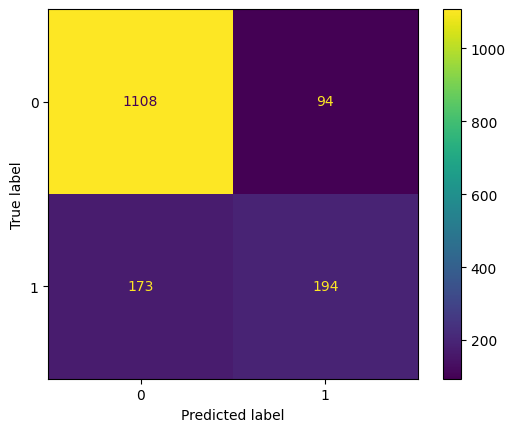

In [ ]:
cm = confusion_matrix(y_eval, best_param_gbm.predict(X_eval), labels=best_param_gbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
194 + 94

288

In [ ]:
print(classification_report(y_eval, best_param_gbm.predict(X_eval)))

[LightGBM] [Warning] feature_fraction is set=0.8569717691972305, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8569717691972305
[LightGBM] [Warning] lambda_l2 is set=1.5083337319786327e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5083337319786327e-06
[LightGBM] [Warning] lambda_l1 is set=7.427695424061678, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.427695424061678
[LightGBM] [Warning] bagging_fraction is set=0.5425825263954398, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5425825263954398
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1202
           1       0.67      0.53      0.59       367

    accuracy                           0.83      1569
   macro avg       0.77      0.73      0.74      1569
weighted avg       0.82      0.83      0.82   

#### **Results from the above modeling**



- In the test dataset, our initial approach involved making phone calls to 1569 people, resulting in 367 purchases. With the integration of this model for predictive analysis prior to calling, we only needed to reach out to 288 individuals, and 194 of them made a purchase. This led to a remarkable 80% reduction in our efforts.

- The LightGBM classifier, when applied to the test data, successfully pinpointed 53% of individuals who purchased. Following this identification, a 67% purchase rate was observed.

- Recognize the potential for a 47% loss in sales opportunities.
